In [1]:
# Up to this point we have not used R, but now we can no longer avoid that
# The arules pachage for R is the best around, by any industry standard
# But, we will be calling R from python using Rpy2

# You will need to have R installed, as well as Rpy2 and the arules library
from rpy2.robjects.packages import importr
from rpy2 import robjects as robj

base = importr('base')
mlbench= importr('mlbench')

robj.r('data(Zoo)') # load up an R DataFrame
robj.r('head(Zoo)') # print part of it from R

<DataFrame - Python:0x11482a7e8 / R:0x7feeac28e0d0>
[BoolV..., BoolV..., BoolV..., ..., BoolV..., BoolV..., Facto...]
  hair: <class 'rpy2.robjects.vectors.BoolVector'>
  <BoolVector - Python:0x114793fc8 / R:0x7feead0831b8>
[       1,        1,        0,        1,        1,        1]
  feathers: <class 'rpy2.robjects.vectors.BoolVector'>
  <BoolVector - Python:0x1148b8f38 / R:0x7feead0830e0>
[       0,        0,        0,        0,        0,        0]
  eggs: <class 'rpy2.robjects.vectors.BoolVector'>
  <BoolVector - Python:0x1147cbcf8 / R:0x7feead083008>
[       0,        0,        1,        0,        0,        0]
  ...
  hair: <class 'rpy2.robjects.vectors.BoolVector'>
  <BoolVector - Python:0x1147cb7e8 / R:0x7feeacf08b18>
[       0,        0,        0,        0,        0,        0]
  feathers: <class 'rpy2.robjects.vectors.BoolVector'>
  <BoolVector - Python:0x114726878 / R:0x7feeacf08a40>
[       1,        1,        0,        1,        1,        1]
  eggs: <class 'rpy2.robjects.vec

In [2]:
# the robj get tedious so instead, we will use the shorthand of %R

# this way we can write r code by simply writing %R
%load_ext rmagic
%load_ext rpy2.ipython 
# this enables the %R extension to iPython (does not work outside of the iPython shell)

/Library/Python/2.7/site-packages/IPython/extensions/rmagic.py:11: UserWarning: The rmagic extension in IPython has moved to `rpy2.ipython`, please see `rpy2` documentation.
  warnings.warn("The rmagic extension in IPython has moved to "


In [3]:
%R data(Zoo)
%R head(Zoo)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammal
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,fish
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammal
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammal


In [4]:
# we can also transfer data between R and python using the Pandas objects (which are highly similar)
import pandas.rpy.common as com

Zoo = com.load_data('Zoo')
Zoo.head() # this is an R variable that we are manipulating in python
# using this type of coding is a bit more pythonic

/Library/Python/2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html
  from ipykernel import kernelapp as app


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
antelope,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
bass,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
bear,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
boar,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


Populating the interactive namespace from numpy and matplotlib


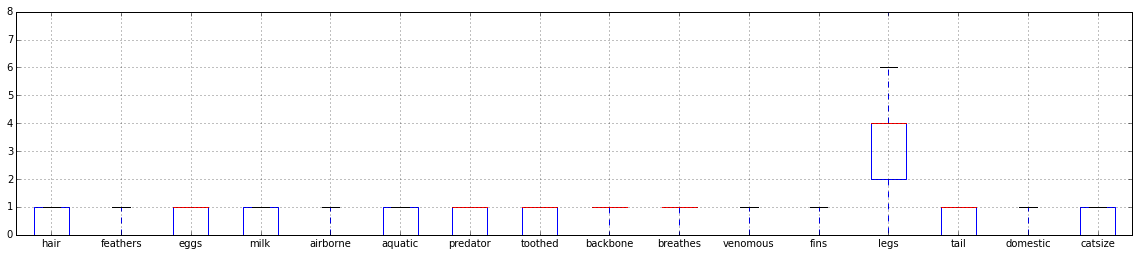

array([ 0.   ,  2.   ,  4.   ,  2.842,  4.   ,  8.   ])

In [25]:
# We can access this DataFrame using R functions and pandas functions
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame as pDataFrame

%pylab inline

plt.figure(figsize=(20, 4))
ax = Zoo.boxplot() # a function from pandas
plt.show()

base.summary( Zoo["legs"] ) # a function from R

In [14]:
from pandas import DataFrame as pDataFrame
from sklearn.datasets import load_iris

iris = load_iris()

# convert to pandas DataFrame
data = pDataFrame(iris.data, columns=['petal_length','petal_width','sepal_length','sepal_width']) 
print data.info()
# convert to an R object
data_as_r = com.convert_to_r_dataframe(data)
base.summary(data_as_r.rx2("origin"))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 4 columns):
petal_length    150 non-null float64
petal_width     150 non-null float64
sepal_length    150 non-null float64
sepal_width     150 non-null float64
dtypes: float64(4)None


array(['0', 'NULL', 'NULL'], 
      dtype='|S4')

In [26]:
# the following example is adapted from Prof. Hahsler's arules demo, 
#   http://michael.hahsler.net/SMU/EMIS7332/R/chap6.html
arules = importr('arules') # same as importing in R with the "library" command

# # we could do this the entire time, sending strings to R and getting back outputs 
# has_legs = Zoo["legs"]>0
# Zoo[["legs"]] = base.as_factor(has_legs)
# # trans = base.transform(Zoo,"transactions"), # unclear how to perform in Rpy2
# # isets = arules.apriori(trans) # need additions
# # isets.head()

##Using R magics
Using the r magics in iPython is a much easier and more consistent use of R coding.

In [27]:
# load up some zoo data
%R data(Zoo)

# make the "legs" attirbute binary
%R has_legs <- Zoo["legs"]>0
%R Zoo[["legs"]] <- as.factor(has_legs)

# convert to transactions, where column indicates the output of the attribute
# so "hair" as an attribute would generate two columns -> "hair=TRUE and hair=FALSE"
%R trans <- as(Zoo, "transactions")

# Now that we have transactions, its time to run the apriori algorithm
%R isets <- apriori(trans, parameter=list(target="frequent", support=0.5))

# sort it and display some of the frequent itemsets from apriori
%R isets <- sort(isets, by="support") 
%R inspect(head(isets, n=10))
%R length(isets)


parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen
        0.8    0.1    1 none FALSE            TRUE     0.5      1     10
            target   ext
 frequent itemsets FALSE

algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

apriori - find association rules with the apriori algorithm
version 4.21 (2004.05.09)        (c) 1996-2004   Christian Borgelt
set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[39 item(s), 101 transaction(s)] done [0.00s].
sorting and recoding items ... [16 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [242 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


   items              support
1  {venomous=FALSE} 0.9207921
2  {domestic=FALSE} 0.8712871
3  {fins=FALSE}     0.8316832
4  {backbone=TRUE}  0.8217822
5  {feathers=FALSE} 0.8019802
6  {venomous=FALSE,          
    domestic=FALSE} 0.8019802
7  {breathes=TRUE}  0.7920792
8  {backbone=TRUE,           
    venomous=FALSE} 0.7821782
9  {legs=TRUE}      0.7722772
10 {airborne=FALSE} 0.7623762


array([242], dtype=int32)

In [28]:
# Do same thing, getting only the maximal sets
%R is_max <- isets[is.maximal(isets)]
%R inspect(head(sort(is_max, by="support")))
%R length(is_max)

  items              support
1 {backbone=TRUE,           
   venomous=FALSE,          
   tail=TRUE,               
   domestic=FALSE} 0.6039604
2 {feathers=FALSE,          
   airborne=FALSE,          
   venomous=FALSE,          
   domestic=FALSE} 0.5742574
3 {catsize=FALSE}  0.5643564
4 {feathers=FALSE,          
   fins=FALSE,              
   domestic=FALSE} 0.5445545
5 {feathers=FALSE,          
   airborne=FALSE,          
   toothed=TRUE,            
   backbone=TRUE,           
   venomous=FALSE} 0.5445545
6 {backbone=TRUE,           
   breathes=TRUE,           
   venomous=FALSE,          
   fins=FALSE,              
   legs=TRUE,               
   tail=TRUE}      0.5445545


array([35], dtype=int32)

In [30]:
# generate some rules from the frequent itemsets
%R rules <- apriori(trans, parameter=list(support=.5, confidence=.9))

%R inspect(head(rules, n=10))

# print out measures of rule quality
%R quality(head(rules))


parameter specification:
 confidence minval smax arem  aval originalSupport support minlen maxlen target
        0.9    0.1    1 none FALSE            TRUE     0.5      1     10  rules
   ext
 FALSE

algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

apriori - find association rules with the apriori algorithm
version 4.21 (2004.05.09)        (c) 1996-2004   Christian Borgelt
set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[39 item(s), 101 transaction(s)] done [0.00s].
sorting and recoding items ... [16 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [381 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


   lhs                rhs                support confidence     lift
1  {}              => {venomous=FALSE} 0.9207921  0.9207921 1.000000
2  {predator=TRUE} => {domestic=FALSE} 0.5346535  0.9642857 1.106737
3  {hair=FALSE}    => {eggs=TRUE}      0.5346535  0.9310345 1.593805
4  {eggs=TRUE}     => {hair=FALSE}     0.5346535  0.9152542 1.593805
5  {hair=FALSE}    => {milk=FALSE}     0.5544554  0.9655172 1.625287
6  {milk=FALSE}    => {hair=FALSE}     0.5544554  0.9333333 1.625287
7  {hair=FALSE}    => {domestic=FALSE} 0.5346535  0.9310345 1.068574
8  {eggs=TRUE}     => {milk=FALSE}     0.5742574  0.9830508 1.654802
9  {milk=FALSE}    => {eggs=TRUE}      0.5742574  0.9666667 1.654802
10 {eggs=TRUE}     => {domestic=FALSE} 0.5346535  0.9152542 1.050462


,support,confidence,lift
0,0.920792,0.920792,1.000000
1,0.534653,0.964286,1.106737
2,0.534653,0.931034,1.593805
3,0.534653,0.915254,1.593805
4,0.554455,0.965517,1.625287
5,0.554455,0.933333,1.625287


In [31]:
# sort out the rules and print additional "interest" measures
%R rules <- sort(rules, by="lift")
%R inspect(head(rules, n=10))
%R interestMeasure(rules[1:10], method=c("phi", "gini"), trans=trans)

   lhs                 rhs            support confidence     lift
1  {milk=FALSE,                                                  
    venomous=FALSE} => {eggs=TRUE}  0.5148515  1.0000000 1.711864
2  {hair=FALSE,                                                  
    eggs=TRUE}      => {milk=FALSE} 0.5346535  1.0000000 1.683333
3  {eggs=TRUE}      => {milk=FALSE} 0.5742574  0.9830508 1.654802
4  {milk=FALSE}     => {eggs=TRUE}  0.5742574  0.9666667 1.654802
5  {eggs=TRUE,                                                   
    domestic=FALSE} => {milk=FALSE} 0.5247525  0.9814815 1.652160
6  {eggs=TRUE,                                                   
    venomous=FALSE} => {milk=FALSE} 0.5148515  0.9811321 1.651572
7  {hair=FALSE,                                                  
    milk=FALSE}     => {eggs=TRUE}  0.5346535  0.9642857 1.650726
8  {milk=FALSE,                                                  
    domestic=FALSE} => {eggs=TRUE}  0.5247525  0.9636364 1.649615
9  {milk=F

,phi,gini
0,0.869165,0.367023
1,0.886062,0.378661
2,0.938848,0.425121
3,0.938848,0.428232
4,0.845641,0.344901
5,0.828254,0.330864
6,0.860375,0.359636
7,0.841898,0.344356
8,0.820881,0.329491
9,0.878503,0.372228


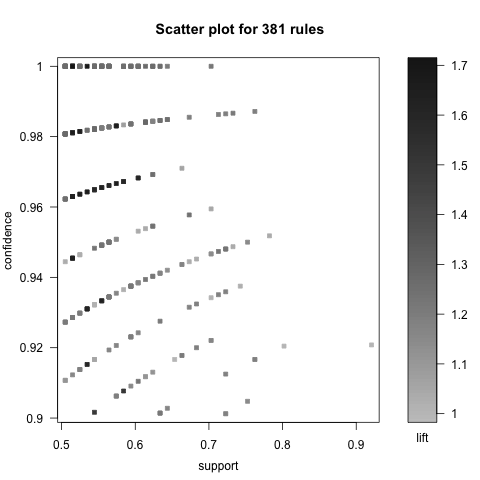

In [32]:
# visualize the different rules
arules_viz = importr('arulesViz')
%R plot(rules)

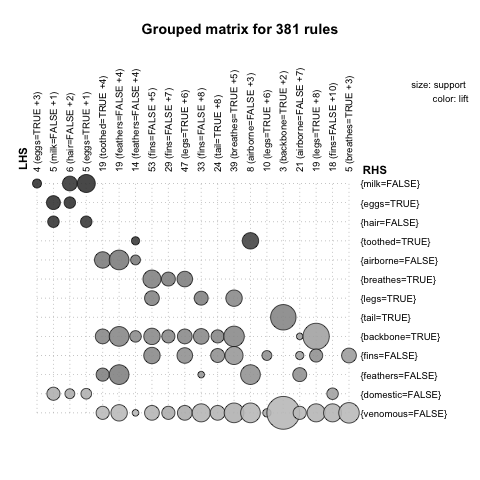

    lhs                 rhs                support confidence      lift
1   {milk=FALSE,                                                       
     venomous=FALSE} => {eggs=TRUE}      0.5148515  1.0000000 1.7118644
2   {hair=FALSE,                                                       
     eggs=TRUE}      => {milk=FALSE}     0.5346535  1.0000000 1.6833333
3   {eggs=TRUE}      => {milk=FALSE}     0.5742574  0.9830508 1.6548023
4   {milk=FALSE}     => {eggs=TRUE}      0.5742574  0.9666667 1.6548023
5   {eggs=TRUE,                                                        
     domestic=FALSE} => {milk=FALSE}     0.5247525  0.9814815 1.6521605
6   {eggs=TRUE,                                                        
     venomous=FALSE} => {milk=FALSE}     0.5148515  0.9811321 1.6515723
7   {hair=FALSE,                                                       
     milk=FALSE}     => {eggs=TRUE}      0.5346535  0.9642857 1.6507264
8   {milk=FALSE,                                                

array([381], dtype=int32)

In [34]:
# a great plot
%R plot(rules, method="grouped")
%R inspect(rules)
%R length(rules)

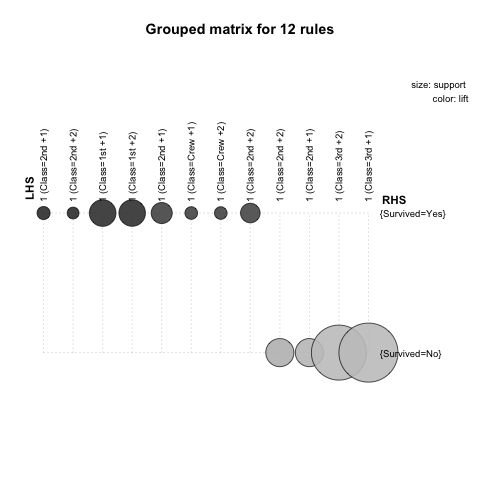

   lhs             rhs                support confidence     lift
1  {Class=2nd,                                                   
    Age=Child}  => {Survived=Yes} 0.010904134  1.0000000 3.095640
2  {Class=2nd,                                                   
    Sex=Female,                                                  
    Age=Child}  => {Survived=Yes} 0.005906406  1.0000000 3.095640
3  {Class=1st,                                                   
    Sex=Female} => {Survived=Yes} 0.064061790  0.9724138 3.010243
4  {Class=1st,                                                   
    Sex=Female,                                                  
    Age=Adult}  => {Survived=Yes} 0.063607451  0.9722222 3.009650
5  {Class=2nd,                                                   
    Sex=Female} => {Survived=Yes} 0.042253521  0.8773585 2.715986
6  {Class=Crew,                                                  
    Sex=Female} => {Survived=Yes} 0.009086779  0.8695652 2.691861
7  {Class=

In [35]:
# An extended example using titanic data
# http://www.rdatamining.com/examples/association-rules 
%R load("~/Documents/titanic.raw.rdata")
%R rules <- apriori(titanic.raw,parameter = list(minlen=2, supp=0.005, conf=0.8), appearance = list(rhs=c("Survived=No", "Survived=Yes"), default="lhs"), control = list(verbose=F))
%R rules.sorted <- sort(rules, by="lift")
%R plot(rules.sorted, method="grouped")
%R inspect(rules.sorted, n=10)